In [1]:
#Misc
import os
import pickle
import importlib

#Data
import pandas as pd
import numpy as np


# Visualización
import cufflinks as cf
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones
plt.style.use('seaborn-white')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
cf.set_config_file(theme='white',dimensions=(650,450))
cf.go_offline()

In [2]:
# Scripts personales
sys.path.insert(1, '../../Datasets/')

# String
import StringUtils 
importlib.reload(StringUtils)

import PlotUtils 
importlib.reload(PlotUtils)

import SupervisedUtils 
importlib.reload(SupervisedUtils)

<module 'SupervisedUtils' from 'c:\\Users\\JesúsAdolfoValenciaM\\Diplomado-en-ciencia-de-datos\\Proyecto\\Modulo 5\\M2\\../../Datasets\\SupervisedUtils.py'>

## Funciones de utilidad

In [3]:
def save_object(obj,name):
  with open(name + '.pkl', 'wb') as file:
    pickle.dump(obj, file, pickle.HIGHEST_PROTOCOL)

def load_object(name):
    with open(name, 'rb') as file:
        return(pickle.load(file))

## Base módulo 1

In [4]:
TMDb = pd.read_feather('../M1/DBM1')
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


## Base de consolidación de IDs

In [5]:
# TMDbIDs = pd.read_csv('../../Datasets/IMDbtoTMDB/TMDbIDs.csv',sep=',')
# TMDbIDs = TMDbIDs.applymap(lambda x : x.replace('[]',''))
# TMDbIDs = TMDbIDs.loc[TMDbIDs['movie_results']!=''].reset_index(drop=True)
# TMDbIDs = TMDbIDs[['movie_results','imdb_id']].set_axis(['id','tconst'],axis=1)
# TMDbIDs

## Base módulo 2

In [6]:
# reviews = reviews.merge(TMDbIDs,on='tconst',how='inner')
# reviews.shape

In [7]:
# TMDb['id'] =TMDb['id'].astype(str)
# revtitles = TMDb.merge(reviews,on = 'id')
# revtitles.head(2)

In [8]:
# hist_box(revtitles,'vote_average','Distribución de la calificación media de los títulos en nuestra base')

# Preprocesamiento de datos

In [9]:
# revtitles = TMDb.copy()
# revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['vote_average']!=0].reset_index(drop=True)
# print(revtitles.shape)
# revtitles = revtitles.sample(50000,random_state=12345)
# revtitles.head(2)
# # revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)

In [10]:
# revtitles = TMDb.copy()
# revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)

# # revtitles = revtitles.loc[revtitles['vote_average']<=revtitles['vote_average'].quantile(0.80)].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['vote_average']>0].reset_index(drop=True)
# # revtitles = revtitles.loc[revtitles['runtime'].isna()==False].reset_index(drop=True)
# revtitles = revtitles.sample(30000,random_state=12345)
# revtitles.head(2)
# # revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)

In [11]:
# revtitles = TMDb.copy()
# revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['popularity']<=revtitles['popularity'].quantile(0.90)].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['popularity']>0.6].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['runtime'].isna()==False].reset_index(drop=True)
# revtitles = revtitles.sample(30000,random_state=12345)
# revtitles.head(2)

## Generación de la target

In [243]:
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


In [244]:
revtitles = TMDb.copy()
revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)
revtitles = revtitles.loc[revtitles['budget']>0].reset_index(drop=True)
revtitles = revtitles.loc[revtitles['vote_average']>0].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)
# revtitles = revtitles.loc[revtitles['overview'].isna()==False].reset_index(drop=True)

In [245]:
others_features = ['year','month','budget','runtime']

In [246]:
revtitles[others_features].isna().sum()

year       394
month      394
budget       0
runtime     53
dtype: int64

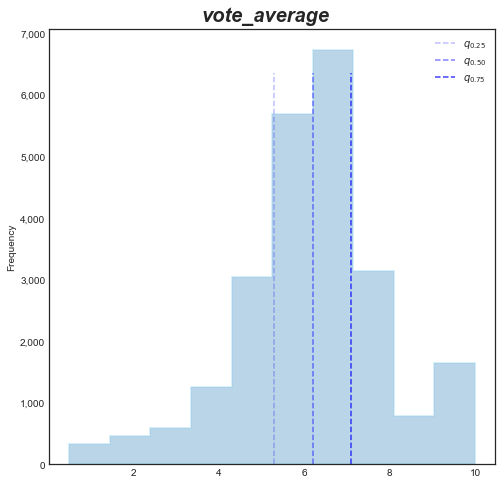

In [247]:
PlotUtils.hist(revtitles,'vote_average')

In [248]:
revtitles = revtitles.dropna(subset=others_features)

In [249]:
# revtitles['Rating']=pd.cut(revtitles['vote_average'],2)
revtitles['Rating']=pd.cut(revtitles['vote_average'],[0,6.5,10],labels=['Malo','Buena'],include_lowest=True)

In [250]:
revtitles['Rating'].value_counts()

Malo     13947
Buena     9264
Name: Rating, dtype: int64

In [251]:
# revtitles = revtitles.groupby('Rating').apply(lambda x: x.sample(min(x.shape[0],15000),random_state=12345)).reset_index(drop=True)
revtitles = revtitles.groupby('Rating').apply(lambda x: x.sample(frac=0.15,random_state=12345)).reset_index(drop=True)

In [252]:
revtitles['Rating'].value_counts()

Malo     2092
Buena    1390
Name: Rating, dtype: int64

In [253]:
# revtitles['Rating']=pd.cut(revtitles['vote_average'],[0,5,7.5,10],labels=['Malo','Regular','Bueno'],include_lowest=True)

In [254]:
# revtitles['Rating']=pd.cut(revtitles['popularity'],[0,1.21,3.077],labels=['Poco vista','Best Seller'])

## Limpieza de la variable independiente

#### Limpieza para TF-IDF

In [255]:
engstopwords = StringUtils.stopwords.words('english')
# customsw  = ['one','film','movie','man','two','story']
# engstopwords = engstopwords + customsw



In [256]:
str_var = 'overview'
revtitles[str_var +'_clean']=StringUtils.clean_re(revtitles[str_var])
revtitles[str_var +'_clean']=StringUtils.remove_stopwords(revtitles[str_var +'_clean'],engstopwords)
revtitles[str_var +'_clean']=StringUtils.remove_accents(revtitles[str_var +'_clean'])

### Comparativo de variable no limpia vs limpia

#### TF-IDF

In [257]:
revtitles[[str_var,str_var +'_clean']]

,overview,overview_clean
0,In the grand tradition of Disney's great music...,grand tradition disney great musical classics ...
1,A home invasion horror movie in the vein of Yo...,home invasion horror movie vein next purge gro...
2,Christmas in the Nolan household isn't what it...,christmas nolan household used instead joyous ...
3,Join the beautiful ladies of Women Superstars ...,join beautiful ladies women superstars uncenso...
4,When the neighborhood's beloved dogs are stole...,neighborhood beloved dogs stolen comic book in...
...,...,...
3477,After finding a host body in investigative rep...,finding host body investigative reporter eddie...
3478,Chris is the top brain who just wants to party...,chris top brain wants party mitch year old col...
3479,Jordynne Grace vs. Rachel Ellering Karen Q & ...,jordynne grace rachel ellering karen tasha ste...
3480,Two young neighbors embark on a first love rel...,two young neighbors embark first love relation...


## Estadísticas de nuestra variable independiente

In [258]:
revtitles['nwords']=revtitles[str_var + '_clean'].str.split().str.len()

### Distribución

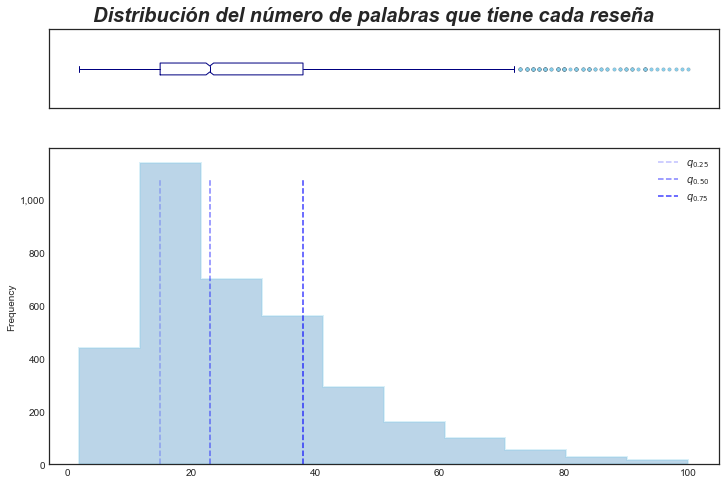

In [259]:
PlotUtils.hist_box(revtitles,'nwords','Distribución del número de palabras que tiene cada reseña')

### Palabras mas usadas

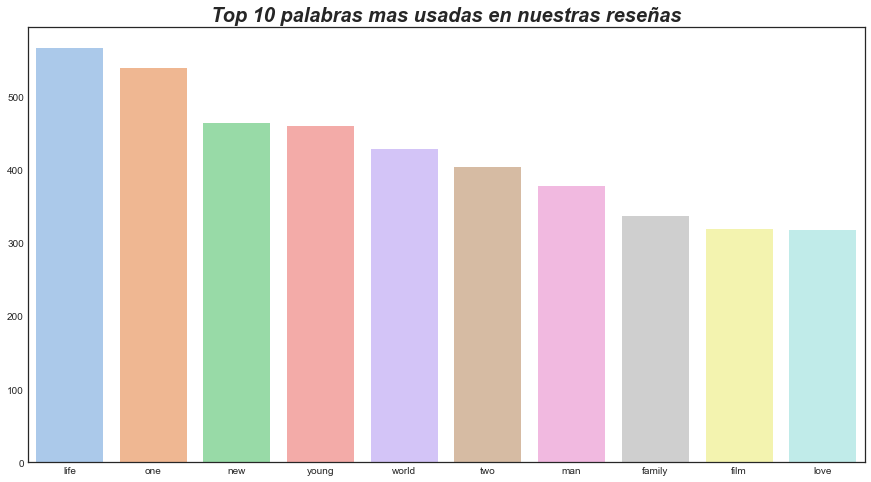

In [260]:
vocabulary = [word for lst in revtitles[str_var + '_clean'].str.split() for word in lst]

vocabcount=pd.Series(vocabulary).value_counts()[:10]

plt.figure(figsize=(15,8))
sns.barplot(x=vocabcount.index,y=vocabcount,palette='pastel')
plt.xticks(rotation=0)
plt.title('Top 10 palabras mas usadas en nuestras reseñas',size=20,fontstyle='italic',fontweight='bold')
plt.show()

## Partición de los datos

In [261]:
le = SupervisedUtils.LabelEncoder()
le.fit(revtitles['Rating'])

LabelEncoder()

In [262]:
y = le.transform(revtitles['Rating'])

X = revtitles[str_var + '_clean']

In [263]:
# y = revtitles['Rating']

# X = revtitles[['budget','runtime','nwords']]

In [264]:
# Separamos nuestros datos de entrenamiento y validación
X_train, X_test, y_train, y_test = SupervisedUtils.train_test_split(X, y, test_size=0.3, random_state=12345)

# Modelado

## Modelos ocupando TF-IDF

### Elección del número de features

#### Regresión logística

In [140]:
# nfeat=np.logspace(3,8,10,dtype=int,base=3)
# nfeat = nfeat[:5]
# nfeat

In [141]:
# LogitModel = LogisticRegression(random_state=12345, n_jobs=-1)

# logitscores=list()

# for n in nfeat[0:4]:
#     score=try_model(LogitModel,n,X_train,y_train,X_test,y_test)
#     logitscores.append(score)
#     print(n)
#     print(score)

#### Random Forest

In [142]:
# RF = RandomForestClassifier(random_state=12345, n_jobs=-1)

# rfscores=list()

# for n in nfeat:
#     score=try_model(RF,n,X_train,y_train,X_test,y_test)
#     rfscores.append(score)
#     print(n)
#     print(score)

#### KNN

In [143]:
# KNN = KNeighborsClassifier(n_jobs=-1)

# knnscores=list()

# for n in nfeat:
#     score=try_model(KNN,n,X_train,y_train,X_test,y_test)
#     knnscores.append(score)
#     print(n)
#     print(score)

#### Elección final del número de features

In [36]:
# ntunning=pd.DataFrame(logitscores,index=nfeat,columns=['Regresión Logistica'])
# ntunning['Random Forest']=rfscores
# ntunning['KNN']=knnscores

In [37]:
# ntunning

In [38]:
# ntunning.plot(logx=True,figsize=(20,8))

# for ind,i in enumerate(nfeat):
#     plt.text(i,logitscores[ind]-0.0035,i)
    
# plt.xticks([])
# plt.title('Score de modelos default con diferente número de features',size=20,fontweight='bold')

### Regresión logística

In [265]:
X_train_TFID, X_test_TFID = SupervisedUtils.text_transformer(X_train, X_test, StringUtils.CountVectorizer())

X_train_TFID = X_train_TFID.toarray()
X_test_TFID = X_test_TFID.toarray()

In [266]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.8)

# pca.fit(X_train_TFID)
# print(pca.n_components_)

# X_train_TFID=pca.transform(X_train_TFID)
# X_test_TFID = pca.transform(X_test_TFID)

In [267]:
revtitles[others_features].isna().sum()

year       0
month      0
budget     0
runtime    0
dtype: int64

In [268]:
X_train_TFID = pd.concat([pd.DataFrame(X_train_TFID).set_index(X_train.index), revtitles.loc[X_train.index,others_features]],axis=1)
X_test_TFID = pd.concat([pd.DataFrame(X_test_TFID).set_index(X_test.index), revtitles.loc[X_test.index,others_features]],axis=1)


In [269]:
X_train_TFID

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,14251,14252,14253,14254,14255,14256,14257,14258,14259,14260,14261,14262,14263,14264,14265,14266,14267,14268,14269,14270,14271,14272,14273,14274,14275,14276,14277,14278,14279,14280,14281,14282,14283,14284,14285,14286,14287,14288,14289,14290,14291,14292,14293,14294,14295,14296,14297,14298,14299,14300,14301,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311,14312,14313,14314,14315,14316,14317,14318,14319,14320,14321,14322,14323,14324,14325,14326,14327,14328,14329,14330,14331,14332,14333,14334,14335,14336,14337,14338,14339,14340,14341,14342,14343,14344,14345,14346,14347,14348,14349,14350,14351,14352,14353,14354,14355,14356,14357,14358,14359,14360,14361,14362,14363,14364,14365,14366,14367,14368,14369,14370,14371,14372,14373,14374,14375,14376,14377,14378,14379,14380,14381,14382,14383,14384,14385,14386,14387,14388,14389,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399,14400,14401,14402,14403,14404,14405,14406,14407,14408,14409,14410,14411,14412,14413,14414,14415,14416,14417,14418,14419,14420,14421,14422,14423,14424,14425,14426,14427,14428,14429,14430,14431,14432,14433,14434,14435,14436,14437,14438,14439,14440,14441,14442,14443,14444,14445,14446,14447,14448,14449,14450,14451,14452,14453,14454,14455,14456,14457,14458,14459,14460,14461,14462,14463,14464,14465,14466,14467,14468,14469,14470,14471,14472,14473,14474,14475,14476,14477,14478,14479,14480,14481,14482,14483,14484,14485,14486,14487,14488,14489,14490,14491,14492,14493,14494,14495,14496,year,month,budget,runtime
1357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013.0,8.0,35000000.0,0.0
2570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [270]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [271]:
sc.fit(X_train_TFID)

X_train_TFID = sc.transform(X_train_TFID)
X_test_TFID = sc.transform(X_test_TFID)

c:\Python\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Python\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Python\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



#### Modelo default

In [272]:
LogModel = SupervisedUtils.LogisticRegression(random_state=12345, n_jobs=-1)
LogModel.fit(X_train_TFID,y_train)
y_LogModel=LogModel.predict(X_test_TFID)
train_score = LogModel.score(X_train_TFID,y_train)
print(f'Score en train: {train_score}')
test_score = LogModel.score(X_test_TFID,y_test)
print(f'Score en test: {test_score}')

Score en train: 0.9971276159212146
Score en test: 0.6095693779904306


- LAP : 45 min
- WK : 
- PC : 

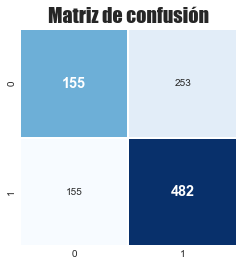

In [273]:
SupervisedUtils.plot_cf(SupervisedUtils.confusion_matrix(y_test,y_LogModel))

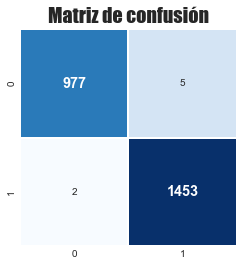

In [274]:
SupervisedUtils.plot_cf(SupervisedUtils.confusion_matrix(y_train,LogModel.predict(X_train_TFID)))

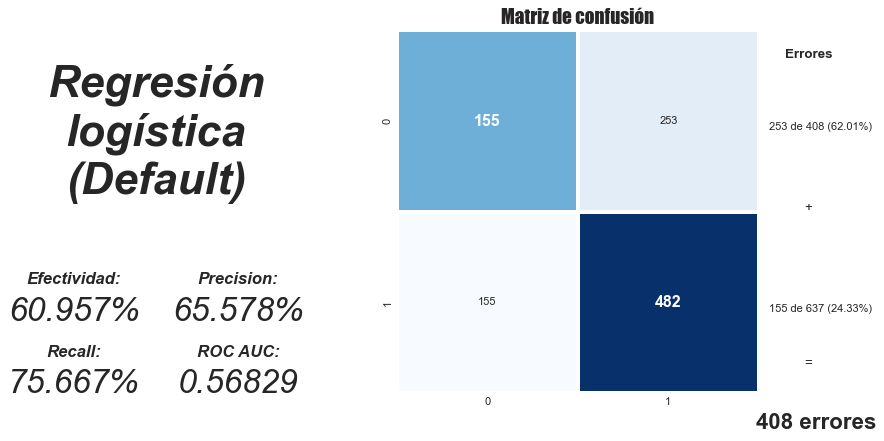

In [275]:
acc_LogModel, prec_LogModel, rec_LogModel, roc_LogModel = SupervisedUtils.model_cf('Regresión\nlogística\n(Default)',y_test,y_LogModel)

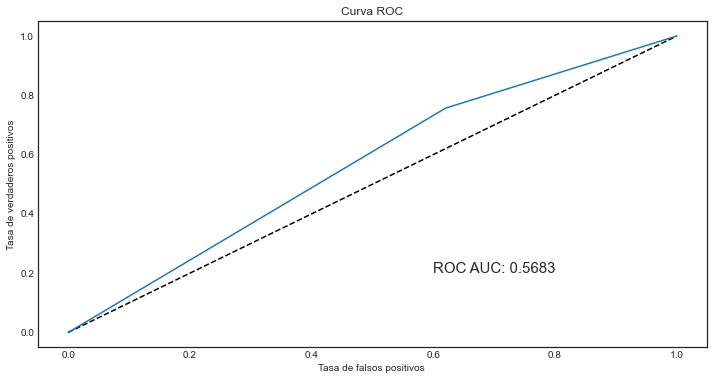

In [276]:
SupervisedUtils.grafica_curva_roc(y_test,y_LogModel)

#### Tunning de parámetro C

In [ ]:
clist = np.logspace(-2,4,20,base=2)

LogitTemp=LogisticRegression(random_state=12345, n_jobs=-1)

train_scores, test_scores = validation_curve(
    LogitTemp,
    X_train_TFID,
    y_train,
    param_name='C',
    param_range=clist,
    cv=3,
    n_jobs=-1,
    scoring="accuracy")
    

In [ ]:
cscores=list(map(np.mean,test_scores))
ctunning = pd.DataFrame(cscores,index=clist,columns=['Score en test'])

In [ ]:
cbest=clist[np.argmax(cscores)]

In [ ]:
ctunning.plot(logx=True,figsize=(20,8))
plt.axvline(x=cbest,label='Valor óptimo',linestyle=':',color='green')
plt.plot([], [],' ',label=f'$C={round(cbest,4)}$')

plt.legend(fontsize = 'large')

for ind,i in enumerate(clist):
    plt.text(i,cscores[ind]-0.15*np.std(cscores),round(i,3))
    
plt.xticks([])
plt.title('Efectividad media de una regresión logística con parámetro C',size=20,fontweight='bold')

#### Mejor regresión logística

In [ ]:
BestLogModel = LogisticRegression(C=cbest,random_state=12345, n_jobs=-1)

In [ ]:
BestLogModel.fit(X_train_TFID,y_train)

In [ ]:
y_BestLogModel = BestLogModel.predict(X_test_TFID)

In [ ]:
acc_BestLogModel, prec_BestLogModel, rec_BestLogModel, roc_BestLogModel = model_cf('\nRegresión\nlogística\n\n(C=5.3556)',y_test,y_BestLogModel)

In [ ]:
grafica_curva_roc(y_test,y_BestLogModel)

### Random Forest

#### Modelo default

In [277]:
RFModel = SupervisedUtils.RandomForestClassifier(random_state=12345, n_jobs=-1)

In [278]:
RFModel.fit(X_train_TFID,y_train)

RandomForestClassifier(n_jobs=-1, random_state=12345)

In [279]:
y_RFModel = RFModel.predict(X_test_TFID)

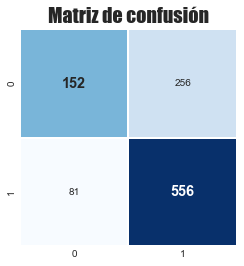

In [280]:
SupervisedUtils.plot_cf(SupervisedUtils.confusion_matrix(y_test,y_RFModel))

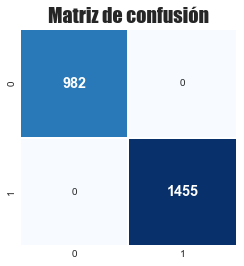

In [281]:
SupervisedUtils.plot_cf(SupervisedUtils.confusion_matrix(y_train,RFModel.predict(X_train_TFID)))

In [282]:
RFModel.score(X_train_TFID,y_train)

1.0

In [283]:
RFModel.score(X_test_TFID,y_test)

0.6775119617224881

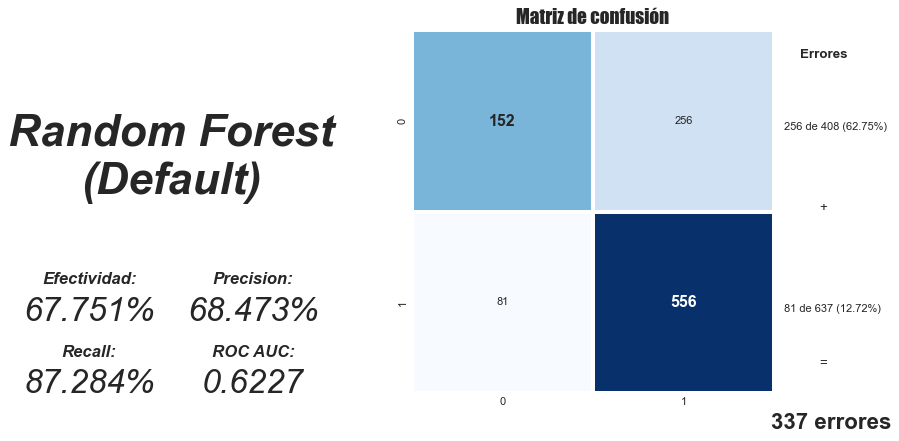

In [284]:
acc_RFModel, prec_RFmodel, rec_RFModel, roc_RFModel = SupervisedUtils.model_cf('Random Forest\n(Default)',y_test,y_RFModel)

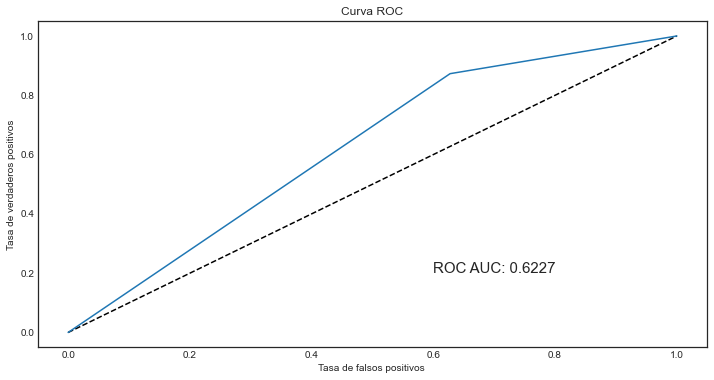

In [285]:
SupervisedUtils.grafica_curva_roc(y_test,y_RFModel)

#### Tunning de parámetros

In [ ]:
param_grid={'criterion' : ['gini','entropy'],
            'min_samples_split' : [2,4,6,10],
            'min_samples_leaf' : [1,2,3],
           }

In [ ]:
RF = RandomForestClassifier(random_state=12345, n_jobs=-1)

In [ ]:
search_RF = HalvingGridSearchCV(RF, resource='n_estimators', max_resources=200,cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train_TFID, y_train)

In [ ]:
rftunning=pd.DataFrame(search_RF.cv_results_)

In [ ]:
indrfmax=np.argmax(rftunning['mean_test_score'])
rfbest=rftunning.iloc[indrfmax,:]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
    
ax1 = plt.subplot2grid((1, 10), (0, 0),colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7),colspan=4)

rftunning.plot(use_index=True, y='mean_test_score',figsize=(20,8),ax=ax1)

for ind,i in enumerate(rftunning.index):
    ax1.text(ind,rftunning['mean_test_score'][ind],str(ind),ha='center')

ax1.set_xticks([])
ax1.axvline(x=indrfmax,label='Modelo óptimo',linestyle=':',color='green')
ax1.plot([],[],' ',label=f"Score: {round(rftunning['mean_test_score'][indrfmax],4)}")
ax1.legend()

auxrf=rftunning[[x for x in rftunning if 'param_' in x]]

bbox=[0.25,0,1,1]

table = ax2.table(cellText = auxrf.values, rowLabels = ['Modelo: ' + str(x) for x in auxrf.index],bbox=bbox,colLabels=[x.replace('param_','') for x in auxrf.columns])
ax2.axis('off')

plt.suptitle('Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)',size=20,fontweight='bold')

#### Mejor modelo Random Forest

> Nuestro mejor modelo Random Forest tiene los siguientes parámetros

In [ ]:
auxrf.iloc[indrfmax,:]

In [ ]:
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=4,n_estimators=48,random_state=12345, n_jobs=-1)

In [ ]:
BestRFModel.fit(X_train_TFID,y_train)

In [ ]:
y_BestRFModel = BestRFModel.predict(X_test_TFID)

In [ ]:
acc_BestRFModel, prec_BestRFModel, rec_BestRFModel, roc_BestRFModel = model_cf('\nRandom Forest\n (Mejor modelo)',y_test,y_BestRFModel)

In [ ]:
grafica_curva_roc(y_test,y_BestRFModel)

### KNN

#### Modelo default

In [186]:
KNNModel = SupervisedUtils.KNeighborsClassifier(n_jobs=-1)

In [187]:
KNNModel.fit(X_train_TFID,y_train)

KNeighborsClassifier(n_jobs=-1)

In [188]:
y_KNNModel = KNNModel.predict(X_test_TFID)

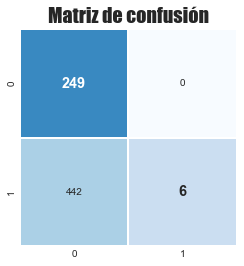

In [189]:
SupervisedUtils.plot_cf(SupervisedUtils.confusion_matrix(y_test,y_KNNModel))

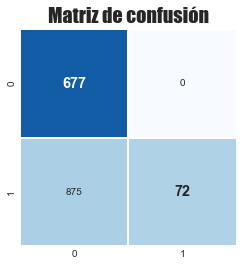

In [190]:
SupervisedUtils.plot_cf(SupervisedUtils.confusion_matrix(y_train,KNNModel.predict(X_train_TFID)))

In [191]:
KNNModel.score(X_train_TFID,y_train)

0.46120689655172414

In [192]:
KNNModel.score(X_test_TFID,y_test)

0.36585365853658536

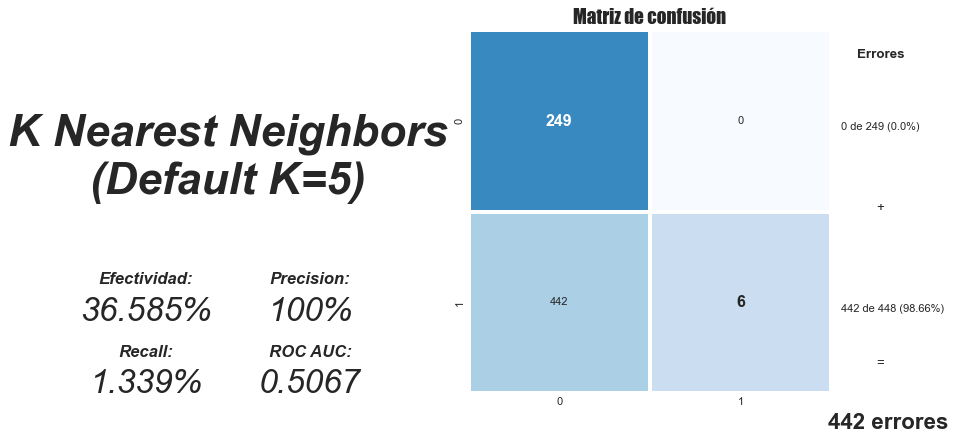

In [193]:
acc_KNNModel, prec_KNNModel, rec_KNNModel, roc_KNNModel = SupervisedUtils.model_cf('K Nearest Neighbors\n(Default K=5)',y_test,y_KNNModel)

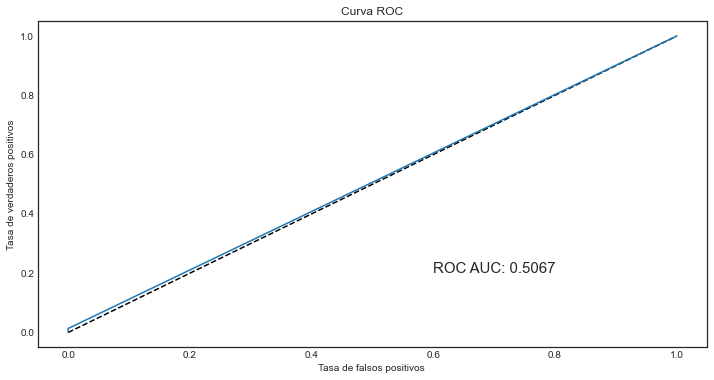

In [194]:
SupervisedUtils.grafica_curva_roc(y_test,y_KNNModel)

#### Tunning de parámetros

In [ ]:
param_grid={'n_neighbors':[5,10,100],
            'weights' : ['uniform', 'distance'],
            'leaf_size':[10,30,50,100],
            'p':[1,2]
           }

In [ ]:
KNN = KNeighborsClassifier(n_jobs=-1)

In [ ]:
search_KNN = HalvingGridSearchCV(KNN, cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train_TFID, y_train)

In [ ]:
knntunning=pd.DataFrame(search_KNN.cv_results_)

In [ ]:
indknnmax=np.argmax(knntunning['mean_test_score'])
knnbest=knntunning.iloc[indknnmax,:]

In [ ]:
plt.figure(figsize=(30, 8), dpi=80)
    
ax1 = plt.subplot2grid((1, 10), (0, 0),colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7),colspan=4)

knntunning.plot(use_index=True, y='mean_test_score',figsize=(20,8),ax=ax1)

for ind,i in enumerate(knntunning.index):
    ax1.text(ind,knntunning['mean_test_score'][ind],str(ind),ha='center',size=7)

ax1.set_xticks([])
ax1.axvline(x=indknnmax,label='Modelo óptimo',linestyle=':',color='green')
ax1.plot([],[],' ',label=f"Score: {round(knntunning['mean_test_score'][indknnmax],4)}")
ax1.legend()

auxknn=knntunning[[x for x in knntunning if 'param_' in x]]

bbox=[0.25,0,1,1]

table = ax2.table(cellText = auxknn.values, rowLabels = ['Modelo: ' + str(x) for x in auxknn.index],bbox=bbox,colLabels=[x.replace('param_','') for x in auxknn.columns])
ax2.axis('off')

table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(2, 2)

plt.suptitle('Efectividad media usando diversos parámetros en un modelo KNN\n(3K Fold CV)',size=20,fontweight='bold')

#### Mejor modelo KNN

> Los mejores parámetros para un modelo KNN son:

In [ ]:
auxknn.iloc[indknnmax,:]

In [ ]:
BestKNNModel = KNeighborsClassifier(n_neighbors=100,leaf_size=100,p=2,weights='distance',n_jobs=-1)

In [ ]:
BestKNNModel.fit(X_train_TFID,y_train)

In [ ]:
y_BestKNNModel = BestKNNModel.predict(X_test_TFID)

In [ ]:
acc_BestKNNModel, prec_BestKNNModel, rec_BestKNNModel, roc_BestKNNModel = model_cf('\nKNN\n (Mejor modelo)',y_test,y_BestKNNModel)

In [ ]:
grafica_curva_roc(y_test,y_BestKNNModel)

### Ensambles

#### Ensamble de modelos default

In [ ]:
y_preds_def= pd.DataFrame(y_LogModel, columns=['Regresión logística'])
y_preds_def['Random Forest']=y_RFModel
y_preds_def['KNN']=y_KNNModel
y_preds_def['Emsable modelos default']=y_preds_def.mode(axis=1)
y_ensdefault=y_preds_def['Emsable modelos default']
y_preds_def.head(10)

In [ ]:
acc_ensdefault, prec_ensdefault, rec_ensdefault, roc_ensdefault = model_cf('Emsable:\n modelos default',y_test,y_ensdefault)

#### Ensamble de modelos seleccionados

In [ ]:
y_preds_best= pd.DataFrame(y_BestLogModel, columns=['Regresión logística'])
y_preds_best['Random Forest']=y_BestRFModel
y_preds_best['KNN']=y_BestKNNModel
y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
y_ensbest=y_preds_best['Emsable mejores modelos']
y_preds_best.head(10)

In [ ]:
acc_ensbest, prec_ensbest, rec_ensbest, roc_ensbest = model_cf('Emsable:\n mejores modelos',y_test,y_ensbest)

### Comparación de modelos

#### Métricas de modelos default

In [ ]:
ModelMetricsDef= pd.DataFrame([acc_LogModel,prec_LogModel,rec_LogModel,roc_LogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetricsDef['Random Forest']=[acc_RFModel,prec_RFmodel,rec_RFModel,roc_RFModel]
ModelMetricsDef['KNN']=[acc_KNNModel,prec_KNNModel,rec_KNNModel,roc_KNNModel]
ModelMetricsDef['Ensamble: Default']=[acc_ensdefault,prec_ensdefault,rec_ensdefault,roc_ensdefault]

In [ ]:
ModelMetricsDef

In [ ]:
# ModelMetricsDef_TFID=ModelMetricsDef
# save_object(ModelMetricsDef_TFID,'ModelMetricsDef_TFID')

In [ ]:
# ModelMetricsDef = load_object('ModelMetricsDef_TFID.pkl')
# ModelMetricsDef_TFID=ModelMetricsDef

#### Métricas de modelos seleccionados

In [ ]:
ModelMetrics= pd.DataFrame([acc_BestLogModel,prec_BestLogModel,rec_BestLogModel,roc_BestLogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetrics['Random Forest']=[acc_BestRFModel,prec_BestRFModel,rec_BestRFModel,roc_RFModel]
ModelMetrics['KNN']=[acc_BestKNNModel,prec_BestKNNModel,rec_BestKNNModel,roc_BestKNNModel]
ModelMetrics['Ensamble: Mejores modelos']=[acc_ensbest,prec_ensbest,rec_ensbest,roc_ensbest]

In [ ]:
ModelMetrics

In [ ]:
# ModelMetrics_TFID=ModelMetrics
# save_object(ModelMetrics_TFID,'ModelMetrics_TFID')

In [ ]:
# ModelMetrics = load_object('ModelMetrics_TFID.pkl')
# ModelMetrics_TFID=ModelMetrics

### Resumen

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="$\\bf{Modelos\ seleccionados}$")

for ind,i in enumerate(ModelMetrics.columns):
    ax.bar(xticks + ind/5, ModelMetrics[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos default')

for ind,i in enumerate(ModelMetricsDef.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('Métricas de modelos entrenados', size=25,fontstyle='italic',fontweight='bold')

In [ ]:
iterables=[['Modelos seleccionados','Modelos default'],ModelMetrics.columns]

In [ ]:
Metrics = pd.concat([ModelMetrics,ModelMetricsDef],axis=1)

In [ ]:
Metrics.columns=pd.MultiIndex.from_product(iterables, names=["", ""])

In [ ]:
Metrics

> De los modelos anterior expuestos, podemos observar que el que en general tiene mejor performance es la regresión logística.  Los demás modelos tienen métricas bastante malas en comparación y por esta razon es que el ensable no nos ayuda mucho a mejorar nuestra predicción. Este podría ser un caso donde un modelo indivual actúa mejor que el ensamble.

> De momento, hasta no realizar el bootstrap, podemos decir que **nuestro mejor candidato es la regresión logística regularizada con el valor de C = 5.3556**

## Modelos ocupando Doc2Vec

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

> Como se había comentado, para la parte de Doc2Vec, nuestra variable independiente no debía someterse a un proceso de limpieza tan agresivo, por lo cual, para la parte de modelo debemos de cambiar esta variable para obtener mejores métricas.

In [ ]:
# y = np.array(['topic'])
y = np.array(revtitles['Rating'])
y= np.where(y=='Bueno',1,0)

X = revtitles['review_semiclean']

In [ ]:
# Separamos nuestros datos de entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
db = pd.DataFrame(np.array([X_train,y_train]).transpose(),columns=['X','y'])

### Elección del número de features

> Al igual que para los modelos ocupando TF-IDF, para Doc2Vec el número de parámetros debe ser optimizado.  

> La idea es la misma que para TF-IDF, se generará un grid de número de features y elegiremos con base en las métricas de modelos default ocupando dichos valores de la grid.

In [ ]:
def dv2_train_test(X_train,X_test,taggeds,n_features,epochs):
    print('Entrenando modelo d2v')
    d2v = Doc2Vec(vector_size=n_features, min_count=1, epochs=epochs)
    d2v.build_vocab(taggeds)
    d2v.train(taggeds, total_examples=d2v.corpus_count, epochs=d2v.epochs)
    
    print('Creando matriz de entrenamiento')
    auxlist=list()

    for t in taggeds:
        v = d2v.infer_vector(t[0])
        auxlist.append(v)
    
    X_train_d2v=pd.DataFrame(auxlist)

    print('Creando matriz de validacion')
    
    auxlist=list()

    for t in X_test:
        v = d2v.infer_vector(t.split())
        auxlist.append(v)
        
    X_test_d2v=pd.DataFrame(auxlist)
    
    return X_train_d2v,X_test_d2v

In [ ]:
def try_d2v(model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    
    return model.score(X_test,y_test)

In [ ]:
train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)

In [ ]:
nfeat=[25,50,100,250,500,1000,2000,3000,4000]

In [ ]:
X_trainsets_d2v=list()
X_testsets_d2v=list()
for n in nfeat:
    trainaux, testaux =dv2_train_test(X_train,X_test,train_tagged,n,10)
    X_trainsets_d2v.append(trainaux)
    X_testsets_d2v.append(testaux)
    print('------------------')
    print('\n')

In [ ]:
save_object(X_trainsets_d2v,'d2v_trainsets')
save_object(X_testsets_d2v,'d2v_testsets')

#### Regresión logística

In [ ]:
LogitModel = LogisticRegression(random_state=12345, n_jobs=-1)

logitscores=list()

for ind, i in enumerate(X_trainsets_d2v):
    print('--------------------')
    score=try_d2v(LogitModel,X_trainsets_d2v[ind],X_testsets_d2v[ind],y_train,y_test)
    logitscores.append(score)
    print(f'Score con {nfeat[ind]} features: {score}')
    print('--------------------')
    
    print('\n')

#### Random Forest

In [ ]:
RF = RandomForestClassifier(random_state=12345, n_jobs=-1)

rfscores=list()

for ind, i in enumerate(X_trainsets_d2v):
    print('--------------------')
    score=try_d2v(RF,X_trainsets_d2v[ind],X_testsets_d2v[ind],y_train,y_test)
    rfscores.append(score)
    print(f'Score con {nfeat[ind]} features: {score}')
    print('--------------------')
    
    print('\n')

#### KNN

In [ ]:
KNN = KNeighborsClassifier(n_jobs=-1)

knnscores=list()

for ind, i in enumerate(X_trainsets_d2v):
    print('--------------------')
    score=try_d2v(KNN,X_trainsets_d2v[ind],X_testsets_d2v[ind],y_train,y_test)
    knnscores.append(score)
    print(f'Score con {nfeat[ind]} features: {score}')
    print('--------------------')
    
    print('\n')

#### Elección final del número de features

In [ ]:
ntunning=pd.DataFrame(logitscores,index=nfeat,columns=['Regresión Logistica'])
ntunning['Random Forest']=rfscores
ntunning['KNN']=knnscores

In [ ]:
ntunning

In [ ]:
ntunning.plot(logx=True,figsize=(20,8))

for ind,i in enumerate(nfeat):
    plt.text(i,logitscores[ind]-0.0035,i)
    
plt.xticks([])
plt.title('Score de modelos default con diferente número de features',size=20,fontweight='bold')

> Vemos que para el caso de la regresió logística, a mayor número de features, su score va incrementando, sin embargo, para los otros modelos es casi lo contrario.

>> Por lo tanto, en virtud de dar un buen performance general a los tres modelos, **se optará por elegir 50 como número de features para los modelos con Doc2Vec**

In [ ]:
train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)

In [ ]:
print('Entrenando modelo d2v')

d2v = Doc2Vec(vector_size=50, min_count=1, epochs=10)
d2v.build_vocab(train_tagged)
d2v.train(train_tagged, total_examples=d2v.corpus_count, epochs=d2v.epochs)

print('Creando matriz de entrenamiento')

auxlist=list()

for t in train_tagged:
    v = d2v.infer_vector(t[0])
    auxlist.append(v)
    
X_train_d2v=pd.DataFrame(auxlist)

print('Creando matriz de validacion')
    
auxlist=list()

for t in X_test:
    v = d2v.infer_vector(t.split())
    auxlist.append(v)
        
X_test_d2v=pd.DataFrame(auxlist)

### Regresión logística

#### Modelo default

In [ ]:
LogModel = LogisticRegression(random_state=12345, n_jobs=-1)

In [ ]:
LogModel.fit(X_train_d2v,y_train)

In [ ]:
y_LogModel=LogModel.predict(X_test_d2v)

In [ ]:
acc_LogModel, prec_LogModel, rec_LogModel, roc_LogModel = model_cf('Regresión\nlogística\n(Default)',y_test,y_LogModel)

In [ ]:
grafica_curva_roc(y_test,y_LogModel)

#### Tunning de parámetro C

In [ ]:
clist = np.logspace(-2,4,20,base=2)

LogitTemp=LogisticRegression(random_state=12345, n_jobs=-1)

train_scores, test_scores = validation_curve(
    LogitTemp,
    X_train_d2v,
    y_train,
    param_name='C',
    param_range=clist,
    cv=3,
    n_jobs=-1,
    scoring="accuracy")
    

In [ ]:
cscores=list(map(np.mean,test_scores))
ctunning = pd.DataFrame(cscores,index=clist,columns=['Score en test'])

In [ ]:
cbest=clist[np.argmax(cscores)]

In [ ]:
ctunning.plot(logx=True,figsize=(20,8))
plt.axvline(x=cbest,label='Valor óptimo',linestyle=':',color='green')
plt.plot([], [],' ',label=f'$C={round(cbest,4)}$')

plt.legend(fontsize = 'large')

for ind,i in enumerate(clist):
    plt.text(i,cscores[ind]-0.15*np.std(cscores),round(i,3))
    
plt.xticks([])
plt.title('Efectividad media de una regresión logística con parámetro C',size=20,fontweight='bold')

#### Mejor regresión logística

In [ ]:
BestLogModel = LogisticRegression(C=cbest,random_state=12345, n_jobs=-1)

In [ ]:
BestLogModel.fit(X_train_d2v,y_train)

In [ ]:
y_BestLogModel = BestLogModel.predict(X_test_d2v)

In [ ]:
acc_BestLogModel, prec_BestLogModel, rec_BestLogModel, roc_BestLogModel = model_cf('\nRegresión\nlogística\n\n(C=8.2972)',y_test,y_BestLogModel)

In [ ]:
grafica_curva_roc(y_test,y_BestLogModel)

### Random Forest

#### Modelo default

In [ ]:
RFModel = RandomForestClassifier(random_state=12345, n_jobs=-1)

In [ ]:
RFModel.fit(X_train_d2v,y_train)

In [ ]:
y_RFModel = RFModel.predict(X_test_d2v)

In [ ]:
acc_RFModel, prec_RFmodel, rec_RFModel, roc_RFModel = model_cf('Random Forest\n(Default)',y_test,y_RFModel)

In [ ]:
grafica_curva_roc(y_test,y_RFModel)

#### Tunning de parámetros

In [ ]:
param_grid={'criterion' : ['gini','entropy'],
            'min_samples_split' : [2,4,6,10],
            'min_samples_leaf' : [1,2,3],
           }

In [ ]:
RF = RandomForestClassifier(random_state=12345, n_jobs=-1)

In [ ]:
search_RF = HalvingGridSearchCV(RF, resource='n_estimators', max_resources=200,cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train_d2v, y_train)

In [ ]:
rftunning=pd.DataFrame(search_RF.cv_results_)

In [ ]:
indrfmax=np.argmax(rftunning['mean_test_score'])
rfbest=rftunning.iloc[indrfmax,:]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
    
ax1 = plt.subplot2grid((1, 10), (0, 0),colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7),colspan=4)

rftunning.plot(use_index=True, y='mean_test_score',figsize=(20,8),ax=ax1)

for ind,i in enumerate(rftunning.index):
    ax1.text(ind,rftunning['mean_test_score'][ind],str(ind),ha='center')

ax1.set_xticks([])
ax1.axvline(x=indrfmax,label='Modelo óptimo',linestyle=':',color='green')
ax1.plot([],[],' ',label=f"Score: {round(rftunning['mean_test_score'][indrfmax],4)}")
ax1.legend()

auxrf=rftunning[[x for x in rftunning if 'param_' in x]]

bbox=[0.25,0,1,1]

table = ax2.table(cellText = auxrf.values, rowLabels = ['Modelo: ' + str(x) for x in auxrf.index],bbox=bbox,colLabels=[x.replace('param_','') for x in auxrf.columns])
ax2.axis('off')

plt.suptitle('Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)',size=20,fontweight='bold')

#### Mejor modelo Random Forest

> Nuestro mejor modelo Random Forest tiene los siguientes parámetros

In [ ]:
auxrf.iloc[indrfmax,:]

In [ ]:
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=10,n_estimators=192,random_state=12345, n_jobs=-1)

In [ ]:
BestRFModel.fit(X_train_d2v,y_train)

In [ ]:
y_BestRFModel = BestRFModel.predict(X_test_d2v)

In [ ]:
acc_BestRFModel, prec_BestRFModel, rec_BestRFModel, roc_BestRFModel = model_cf('\nRandom Forest\n (Mejor modelo)',y_test,y_BestRFModel)

In [ ]:
grafica_curva_roc(y_test,y_BestRFModel)

### KNN

#### Modelo default

In [ ]:
KNNModel = KNeighborsClassifier(n_jobs=-1)

In [ ]:
KNNModel.fit(X_train_d2v,y_train)

In [ ]:
y_KNNModel = KNNModel.predict(X_test_d2v)

In [ ]:
acc_KNNModel, prec_KNNModel, rec_KNNModel, roc_KNNModel = model_cf('K Nearest Neighbors\n(Default K=5)',y_test,y_KNNModel)

In [ ]:
grafica_curva_roc(y_test,y_KNNModel)

#### Tunning de parámetros

In [ ]:
param_grid={'n_neighbors':[5,10,100],
            'weights' : ['uniform', 'distance'],
            'leaf_size':[10,30,50,100],
            'p':[1,2]
           }

In [ ]:
KNN = KNeighborsClassifier(n_jobs=-1)

In [ ]:
search_KNN = HalvingGridSearchCV(KNN, cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train_d2v, y_train)

In [ ]:
knntunning=pd.DataFrame(search_KNN.cv_results_)

In [ ]:
indknnmax=np.argmax(knntunning['mean_test_score'])
knnbest=knntunning.iloc[indknnmax,:]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
    
ax1 = plt.subplot2grid((1, 10), (0, 0),colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7),colspan=4)

knntunning.plot(use_index=True, y='mean_test_score',figsize=(20,8),ax=ax1)

for ind,i in enumerate(knntunning.index):
    ax1.text(ind,knntunning['mean_test_score'][ind],str(ind),ha='center')

ax1.set_xticks([])
ax1.axvline(x=indknnmax,label='Modelo óptimo',linestyle=':',color='green')
ax1.plot([],[],' ',label=f"Score: {round(knntunning['mean_test_score'][indknnmax],4)}")
ax1.legend()

auxknn=knntunning[[x for x in knntunning if 'param_' in x]]

bbox=[0.25,0,1,1]

table = ax2.table(cellText = auxknn.values, rowLabels = ['Modelo: ' + str(x) for x in auxknn.index],bbox=bbox,colLabels=[x.replace('param_','') for x in auxknn.columns])
ax2.axis('off')

plt.suptitle('Efectividad media usando diversos parámetros en un modelo KNN\n(3K Fold CV)',size=20,fontweight='bold')

#### Mejor modelo KNN

> Los mejores parámetros para un modelo KNN son:

In [ ]:
auxknn.iloc[indknnmax,:]

In [ ]:
BestKNNModel = KNeighborsClassifier(n_neighbors=10,leaf_size=30,p=2,weights='distance',n_jobs=-1)

In [ ]:
BestKNNModel.fit(X_train_d2v,y_train)

In [ ]:
y_BestKNNModel = BestKNNModel.predict(X_test_d2v)

In [ ]:
acc_BestKNNModel, prec_BestKNNModel, rec_BestKNNModel, roc_BestKNNModel = model_cf('\nKNN\n (Mejor modelo)',y_test,y_BestKNNModel)

In [ ]:
grafica_curva_roc(y_test,y_BestKNNModel)

### Ensambles

#### Ensambles de modelos default

In [ ]:
y_preds_def= pd.DataFrame(y_LogModel, columns=['Regresión logística'])
y_preds_def['Random Forest']=y_RFModel
y_preds_def['KNN']=y_KNNModel
y_preds_def['Emsable modelos default']=y_preds_def.mode(axis=1)
y_ensdefault=y_preds_def['Emsable modelos default']
y_preds_def.head(10)

In [ ]:
acc_ensdefault, prec_ensdefault, rec_ensdefault, roc_ensdefault = model_cf('Emsable:\n modelos default',y_test,y_ensdefault)

#### Ensamble de modelos seleccionados

In [ ]:
y_preds_best= pd.DataFrame(y_BestLogModel, columns=['Regresión logística'])
y_preds_best['Random Forest']=y_BestRFModel
y_preds_best['KNN']=y_BestKNNModel
y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
y_ensbest=y_preds_best['Emsable mejores modelos']
y_preds_best.head(10)

In [ ]:
acc_ensbest, prec_ensbest, rec_ensbest, roc_ensbest = model_cf('Emsable:\n mejores modelos',y_test,y_ensbest)

### Comparación de modelos

#### Métricas de modelos default

In [ ]:
ModelMetricsDef= pd.DataFrame([acc_LogModel,prec_LogModel,rec_LogModel,roc_LogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetricsDef['Random Forest']=[acc_RFModel,prec_RFmodel,rec_RFModel,roc_RFModel]
ModelMetricsDef['KNN']=[acc_KNNModel,prec_KNNModel,rec_KNNModel,roc_KNNModel]
ModelMetricsDef['Ensamble: Default']=[acc_ensdefault,prec_ensdefault,rec_ensdefault,roc_ensdefault]

In [ ]:
ModelMetricsDef

In [ ]:
ModelMetricsDef_d2v = ModelMetricsDef
save_object(ModelMetricsDef_d2v,'ModelMetricsDef_d2v')

#### Métricas de modelos seleccionados

In [ ]:
ModelMetrics= pd.DataFrame([acc_BestLogModel,prec_BestLogModel,rec_BestLogModel,roc_BestLogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetrics['Random Forest']=[acc_BestRFModel,prec_BestRFModel,rec_BestRFModel,roc_RFModel]
ModelMetrics['KNN']=[acc_BestKNNModel,prec_BestKNNModel,rec_BestKNNModel,roc_BestKNNModel]
ModelMetrics['Ensamble: Mejores modelos']=[acc_ensbest,prec_ensbest,rec_ensbest,roc_ensbest]

In [ ]:
ModelMetrics

In [ ]:
ModelMetrics_d2v = ModelMetrics
save_object(ModelMetrics_d2v,'ModelMetrics_d2v')

### Resumen

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="$\\bf{Modelos\ seleccionados}$")

for ind,i in enumerate(ModelMetrics.columns):
    ax.bar(xticks + ind/5, ModelMetrics[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos default')

for ind,i in enumerate(ModelMetricsDef.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('Métricas de modelos entrenados', size=25,fontstyle='italic',fontweight='bold')

In [ ]:
iterables=[['Modelos seleccionados','Modelos default'],ModelMetrics.columns]

In [ ]:
Metrics = pd.concat([ModelMetrics,ModelMetricsDef],axis=1)

In [ ]:
Metrics.columns=pd.MultiIndex.from_product(iterables, names=["", ""])

In [ ]:
Metrics

> De igual manera, **el mejor modelo entrenando con Doc2Vec resultó ser la regresión logística.**  De entre todos los candidatos, preservo la igualdad en las métricas.
>
> Lo realmente destacable de este método de word embedding es que **obtuvo métricas bastante similares al TF-IDF sin ocupar tanto tiempo en realizar la computación**, por lo cual, este método tiene una ventaja enorme contra TF-IDF. Además de que no fue necesario realizar tanto análisis para lograr incrementar nuestras métricas

## TF-IDF vs Doc2Vec

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="Modelos entrenados con TF-IDF")

for ind,i in enumerate(ModelMetricsDef_TFID.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef_TFID[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos entrenados con Doc2Vec')

for ind,i in enumerate(ModelMetricsDef_d2v.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef_d2v[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('TF-IDF vs Doc2Vec\n (Modelos default)', y=1.115,size=25,fontstyle='italic',fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="Modelos entrenados con TF-IDF")

for ind,i in enumerate(ModelMetrics_TFID.columns):
    ax.bar(xticks + ind/5, ModelMetrics_TFID[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos entrenados con Doc2Vec')

for ind,i in enumerate(ModelMetrics_d2v.columns):
    ax.bar(xticks + ind/5, ModelMetrics_d2v[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('TF-IDF vs Doc2Vec\n (Mejores modelos)', y=1.115,size=25,fontstyle='italic',fontweight='bold')

> Salvo bootstrap diga lo contrario, podemos afirmar que **nuestro mejor modelo**, independientemente del tipo de word embedding empleado, **es la regresión logística regularizada.**  
>
> Y referente a lo anterior, podemos realizar un par de observaciones:
>
> * Cuando se empezo a trabajar los modelos con TF-IDF, eran realmente malos sin considerar el análisis de varianza expuesto, por lo cual, Doc2Vec logró métricas excepcionales sin incurrir a tanto análisis.
> * **La ventaja principal respecto a estos dos métodos es el tiempo de computación.** Claramente es notorio, mientras que para lograr unas métricas similares **con TF-IDF nos tómo casi 70 minutos, con Doc2Vec nos tomó 10 aproximadamente.**
> * En general, podríamos decir que si se emplea un método de word embedding mas sofisticado es mas sencillo entrenar un modelo de clasificación de texto y obtener mejores métricas


# Elección de modelo y bootstrap

## TF-IDF

> Como se menciono anteriormente en el análisis de varianza, el proceso para la reducción de dimensión fue efectivo pero tarda demasiado en ejecutarse (60 minutos aproximadamente), por lo cual, si queremos llevar a la aplicación este método a un proceso bootstrap, simple y sencillamente no terminaríamos, únicamente de reducir dimensiones esperariamos 60 minutos en cada iteración. Si hicieramos 1000 iteraciones, el proceso **tardaría 41 días siendo bastante optimistas**.


> En consencuencia de lo anterior, se intentó realizar este proceso en reiteradas ocasiones intentando si quiera el mínimo de iteraciones (10), sin embargo, el método jamas terminaba (se moría el kernel, se acaba la memoria, la maquina se congelaba). **Por lo cual, realizar bootstrap con un modelo de reducción de dimensión tan ambicioso no es viable.**
>
> La implementación de bootstrap es la siguiente aunque no se haya concluido.

In [ ]:
BestLogModel = LogisticRegression(C=8.297240355569535,random_state=12345, n_jobs=-1)
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=10,n_estimators=192,random_state=12345, n_jobs=-1)
BestKNNModel = KNeighborsClassifier(n_neighbors=10,leaf_size=30,p=2,weights='distance',n_jobs=-1)

### Bootstrap

In [ ]:
t0 = time.time()

num_records = y.shape[0]
bootstrap_errors_logit = []
bootstrap_errors_rf = []
bootstrap_errors_knn = []
bootstrap_errors_ens = []

np.random.seed(0)

for i in range(250):
    train_indices = np.random.choice(range(num_records), num_records, replace=True)
    test_indices = np.setdiff1d(range(num_records), train_indices)
    
    X_train_b, y_train_b = np.array(X)[train_indices], y[train_indices]
    X_test_b, y_test_b = np.array(X)[test_indices], y[test_indices]
    
    db = pd.DataFrame(np.array([X_train_b,y_train_b]).transpose(),columns=['X','y'])
    
    train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)
    
    d2v = Doc2Vec(vector_size=50, min_count=1, epochs=10)
    d2v.build_vocab(train_tagged)
    d2v.train(train_tagged, total_examples=d2v.corpus_count, epochs=d2v.epochs)

    auxlist=list()

    for t in train_tagged:
        v = d2v.infer_vector(t[0])
        auxlist.append(v)
    
    X_train_b=pd.DataFrame(auxlist)
    
    auxlist=list()

    for t in X_test_b:
        v = d2v.infer_vector(t.split())
        auxlist.append(v)
        
    X_test_b=pd.DataFrame(auxlist)

    
    # Logit model L2
    BestLogModel.fit(X_train_b, y_train_b)
    y_Log=BestLogModel.predict(X_test_b)
    bootstrap_errors_logit.append(roc_auc_score(y_test_b, y_Log))
    
    # RF model
    BestRFModel.fit(X_train_b, y_train_b)
    y_RF=BestRFModel.predict(X_test_b)
    bootstrap_errors_rf.append(roc_auc_score(y_test_b, y_RF))
    
    # KNN
    BestKNNModel.fit(X_train_b, y_train_b)
    y_KNN = BestKNNModel.predict(X_test_b)
    bootstrap_errors_knn.append(roc_auc_score(y_test_b, y_KNN))
    
    # Ensamble
    y_preds_best= pd.DataFrame(y_Log, columns=['Regresión logística'])
    y_preds_best['Random Forest']=y_RF
    y_preds_best['KNN']=y_KNN
    y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
    y_ens = y_preds_best['Emsable mejores modelos']
    bootstrap_errors_ens.append(roc_auc_score(y_test_b, y_ens))
    
    print(i)

t1 = time.time()

In [ ]:
print(f'El tiempo de ejecución del proceso bootstrap con 10 iteraciones fue de: {t1-t0} segundos')

## Doc2Vec

> Como se ha mencionado, Doc2Vec nos brindo resultados excepcionales sin ocupar tanto tiempo de computo.  
> Para este método, si fue posible realizar el proceso bootstrap (250 iteraciones) que tomó aproximadamente 16 horas.
>
> Los resultados se exponen a continuación

In [ ]:
BestLogModel = LogisticRegression(C=8.297240355569535,random_state=12345, n_jobs=-1)
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=10,n_estimators=192,random_state=12345, n_jobs=-1)
BestKNNModel = KNeighborsClassifier(n_neighbors=10,leaf_size=30,p=2,weights='distance',n_jobs=-1)

### Bootstrap

In [ ]:
t0 = time.time()

num_records = y.shape[0]
bootstrap_errors_logit = []
bootstrap_errors_rf = []
bootstrap_errors_knn = []
bootstrap_errors_ens = []

np.random.seed(0)

for i in range(250):
    train_indices = np.random.choice(range(num_records), num_records, replace=True)
    test_indices = np.setdiff1d(range(num_records), train_indices)
    
    X_train_b, y_train_b = np.array(X)[train_indices], y[train_indices]
    X_test_b, y_test_b = np.array(X)[test_indices], y[test_indices]
    
    db = pd.DataFrame(np.array([X_train_b,y_train_b]).transpose(),columns=['X','y'])
    
    train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)
    
    d2v = Doc2Vec(vector_size=50, min_count=1, epochs=10)
    d2v.build_vocab(train_tagged)
    d2v.train(train_tagged, total_examples=d2v.corpus_count, epochs=d2v.epochs)

    auxlist=list()

    for t in train_tagged:
        v = d2v.infer_vector(t[0])
        auxlist.append(v)
    
    X_train_b=pd.DataFrame(auxlist)
    
    auxlist=list()

    for t in X_test_b:
        v = d2v.infer_vector(t.split())
        auxlist.append(v)
        
    X_test_b=pd.DataFrame(auxlist)

    
    # Logit model L2
    BestLogModel.fit(X_train_b, y_train_b)
    y_Log=BestLogModel.predict(X_test_b)
    bootstrap_errors_logit.append(roc_auc_score(y_test_b, y_Log))
    
    # RF model
    BestRFModel.fit(X_train_b, y_train_b)
    y_RF=BestRFModel.predict(X_test_b)
    bootstrap_errors_rf.append(roc_auc_score(y_test_b, y_RF))
    
    # KNN
    BestKNNModel.fit(X_train_b, y_train_b)
    y_KNN = BestKNNModel.predict(X_test_b)
    bootstrap_errors_knn.append(roc_auc_score(y_test_b, y_KNN))
    
    # Ensamble
    y_preds_best= pd.DataFrame(y_Log, columns=['Regresión logística'])
    y_preds_best['Random Forest']=y_RF
    y_preds_best['KNN']=y_KNN
    y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
    y_ens = y_preds_best['Emsable mejores modelos']
    bootstrap_errors_ens.append(roc_auc_score(y_test_b, y_ens))
    
    print(i)

t1 = time.time()

### Estadísticas bootstrap

In [ ]:
bootstrapdb=pd.DataFrame(np.array([bootstrap_errors_logit,bootstrap_errors_rf,bootstrap_errors_knn,bootstrap_errors_ens]).transpose(),columns=['Regresión logistica','Random Forest','KNN','Ensamble: Mejores modelos'])

In [ ]:
bootstrapdb=load_object('BTMetricsD2V.pkl')

In [ ]:
bootstrap_metrics=bootstrapdb.describe(percentiles=[0.025,0.975])
bootstrap_metrics

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=bootstrapdb,palette='pastel',whis=(0.025,0.975),orient = 'h',fliersize=2,linewidth=2.5)
plt.xlabel('ROC AUC')
plt.title('Distribución de valores ROC AUC de nuestros modelos\n (Usando bootstrap)',size=20,fontweight='bold')

In [ ]:
plt.figure(figsize=(15,8))
g = sns.barplot(x=bootstrap_metrics.T.index,y=bootstrap_metrics.T['mean'],palette="Blues_d")
g.bar_label(g.containers[0])
plt.title('Valor medio de los valores ROC AUC de nuestros modelos\n(usando bootstrap)',size=20,fontweight='bold')

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,7))

sns.histplot(bootstrapdb,x='Regresión logistica',ax=ax[0],element="step",alpha=0.5,color='red')
sns.histplot(bootstrapdb,x='Random Forest',ax=ax[1],element="step",alpha=0.5,color='blue')
sns.histplot(bootstrapdb,x='KNN',ax=ax[2],element="step",alpha=0.5,color='green')
sns.histplot(bootstrapdb,x='Ensamble: Mejores modelos',ax=ax[3],element="step",alpha=0.5,color='yellow')

fig.suptitle('Distribución de valores ROC AUC de nuestros modelos\n (Usando bootstrap)',size=20,fontweight='bold')

## **Elección final**

> Finalmente, tras todos los modelos entrenados y con base en el bootstrap, podemos decir que **el mejor modelo para atacar nuestro problema es la regresión logística regularizada**, brinda mejores métricas y mas estables.  
>
> Además, se puede tener dos variantes, entrenada con TF-IDF o Doc2Vec pero como se ha expuesto y recalcado, el método Doc2Vec es mucho mas eficaz y mas rápido.

>> **Elección final: Regresión logística regularizada entrenada con word embedding Doc2Vec**

# Redes Neuronales

> A manera de comparativa, se va a entrenar una red neuronal que pretende competir con el modelo anterior seleccionado.

> La principal motivación sobre como está conformada la red es con base en el siguiente artículo:  
>

<center><i><b> "Deep Learning Techniques for Text Classification" [1] </b></i></center>
<center><i> - Diardano Raihan </i>

> Por lo cual, se agracede a Diardano la inspiración y por el uso de algunas funciones útiles que desarrolló.

> El tipo de red que se ocupará es la red convolucional temporal (TCN), que grosso modo es una combinación de una red neuronal convolucional (CNN) y una red neuronal recurrente (RNN).  
> Este tipo de redes han resultado ser bastante eficientes para atacar problemas que involucran la evolución o análisis de problemas mas complejos y mas humanos. 
>
> El proceso del entrenamiento de esta red es el siguiente:

## Paquetería necesaria y funciones de utilidad

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import concatenate, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model


In [ ]:
# Define a function to compute the max length of sequence
def max_length(sequences):
    '''
    input:
        sequences: a 2D list of integer sequences
    output:
        max_length: the max length of the sequences
    '''
    max_length = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_length < length:
            max_length = length
    return max_length

> El input que vamos a ocupar para nuestra red será el de la variable que se ocupó para los modelos Doc2Vec, es decir, la que no tiene un proceso de limpieza tan rudo.

In [ ]:
# y = np.array(['topic'])
y = np.array(revtitles['Rating'])
y= np.where(y=='Bueno',1,0)

X = revtitles['review_semiclean']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

> A diferencia de los modelos anterior entrenados, para una red neuronal de clasificación de texto el método de embedding no debe ser tan complejo.  
>
> Se recomienda usar la tokenización y luego el método de padding (que grosso modo es un método que cuanta las veces que se repite cada palabra en el vocabulario, genera el vector de conteo y a ese vector le agrega tantos ceros como la cantidad de elementos le falten para llegar a la misma longitud del vector de la oración con mas palabras) para posterior hacer un embedding con keras.

In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
max_len = max_length(train_sequences)

X_train_pad = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(test_sequences, maxlen=max_len,  padding='post', truncating='post')

n = len(tokenizer.word_index)+1


### Estructuración de la red

In [ ]:
inp = Input( shape=(max_len,))

x = Embedding(input_dim=n, output_dim=300, input_length=max_len)(inp)
x = SpatialDropout1D(0.1)(x)

x = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = 'relu', name = 'tcn1')(x)
x = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = 'relu', name = 'tcn2')(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)

conc = concatenate([avg_pool, max_pool])
conc = Dense(16, activation="relu")(conc)
conc = Dropout(0.1)(conc)
outp = Dense(1, activation="sigmoid")(conc)    

model = Model(inputs=inp, outputs=outp)


In [ ]:
model.summary()

### Parámetros de optimización

In [ ]:
model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Early call back

> Una manera bastante útil para evitar entrenar una red durante mucho tiempo sin que en realidad haya un avance en su entrenamiento, es el uso de early callbacks. Estos son mecanismos que hacen el tracking de alguna métrica durante el entrenamiento y si se cumplen ciertas condiciones, nosotros le diremos a la red qué queremos que haga.  

> La siguiente es un ejemplo de un early callback que especifica que **si la red no ha aprendido nada** (delta = 0) **pasadas 20 épocas** (patience = 20) -es decir, que el scores de validación no aumente- **haremos que la red pare el entrenamiento y restaure los pesos optimos de la última época que la red aprendió.**

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)

### Entrenamiento

> Se entrenará la red con un total de 1000 épocas (salvo que termine antes por el early callback anterior) y un batch size de 50, que se refiere a cada cuantos registros en nuestra epoca va a modificar los pesos óptimos de la red

In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=50, epochs=100, verbose=1, callbacks=[callbacks], validation_data=(X_test_pad, y_test),workers=6,use_multiprocessing=True)